# Online shoppers intention 

In this exercise, we will try to analyze the 'Online shoppers intention' dataset and develop a ML model that can predict shopper's intention based on his/her shopping habits/characteristics. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset .

00. Data Information
01. Data Upload
02. EDA
03. Data Preprocessing
04. Model Training
05. Fine-tuning
05. Conclusion

# 00. Data Information

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

    - The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
    - The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
    - The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
    
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# 01. Data Upload

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
%cd /content/drive/MyDrive/딥러닝

/content/drive/MyDrive/딥러닝


In [132]:
import pandas as pd 

df = pd.read_csv('./online_shoppers_intention.csv')

In [133]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 02. EDA

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

> We have no missing values in our dataset.

## 2.1 Explore Data Types

In [135]:
# View columns by their data types
for dtype, cols in df.groupby(by=df.dtypes, axis=1):
  print(dtype,cols.columns,'count: ', len(cols.columns))
  print('')

bool Index(['Weekend', 'Revenue'], dtype='object') count:  2

int64 Index(['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType'],
      dtype='object') count:  7

float64 Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay'],
      dtype='object') count:  7

object Index(['Month', 'VisitorType'], dtype='object') count:  2



We have 
- 2 boolean 
- 7 int64
- 7 float64
- 2 string



In [136]:
# View columns by their data types
for dtype, cols in df.groupby(by=df.dtypes, axis=1):
  print(dtype)
  for col in list(cols):
    print(f'unique value of column "{col}" : ', df[col].nunique())
  print('---')

bool
unique value of column "Weekend" :  2
unique value of column "Revenue" :  2
---
int64
unique value of column "Administrative" :  27
unique value of column "Informational" :  17
unique value of column "ProductRelated" :  311
unique value of column "OperatingSystems" :  8
unique value of column "Browser" :  13
unique value of column "Region" :  9
unique value of column "TrafficType" :  20
---
float64
unique value of column "Administrative_Duration" :  3335
unique value of column "Informational_Duration" :  1258
unique value of column "ProductRelated_Duration" :  9551
unique value of column "BounceRates" :  1872
unique value of column "ExitRates" :  4777
unique value of column "PageValues" :  2704
unique value of column "SpecialDay" :  6
---
object
unique value of column "Month" :  10
unique value of column "VisitorType" :  3
---


Above information tells us that certain int64 and float64 features could be categorical.

They could be 'nominal features' which means their numbers do not have order nor hierarchy associated with them.

Lets find out if this is true.

## 2.1.1 Int64 Features

In [137]:
for col in df.select_dtypes('int64').columns:
  print(col,' : ',df[col].unique(),'\n')

Administrative  :  [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Informational  :  [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

ProductRelated  :  [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99 362
 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121 107
 305 199 439 223 230 280 377 310 158 486 153 139 182 221 229 216 170 202


From the numbers above, we can actually determine that some int64 features are numbers with no numerical meaning(high or low), EXCEPT Administrative, Informative and ProductRelated.

Thus, we can consider them as categorical features. Each number is like a 'label' or 'class'. 

Unfortunately, there is no further infomration about what each number represents.

Let's see the relationship between each of these columns with the dataset label 'Revenue'

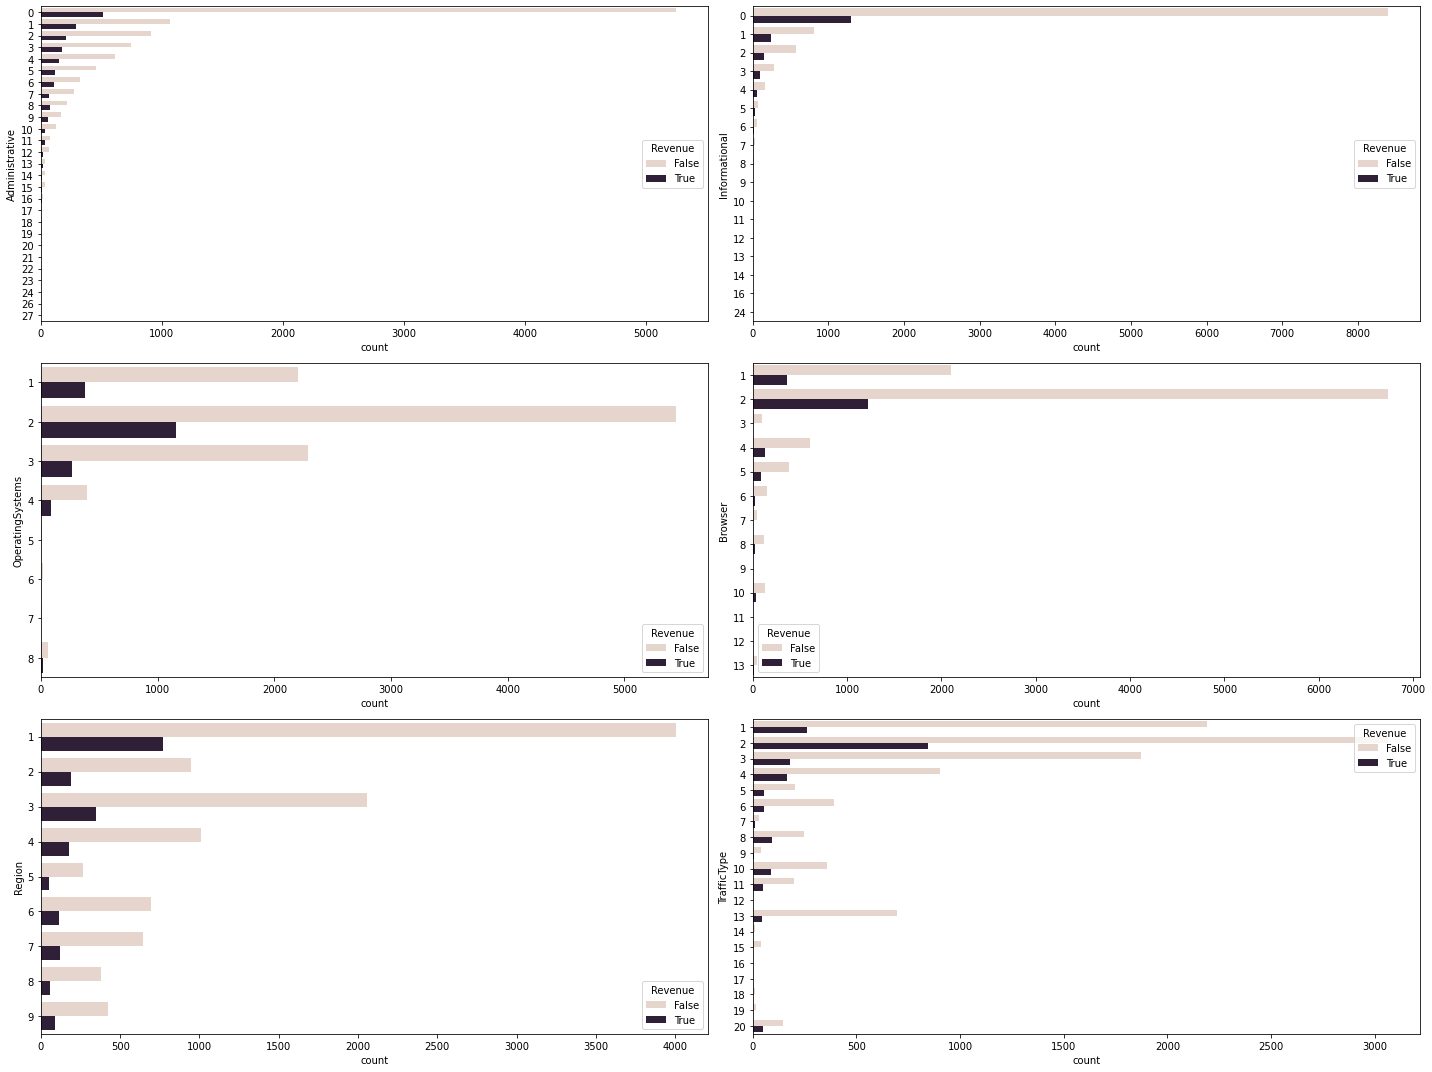

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

#ProductRelated column will be analysed separately, since the number of unique values are much higher.
int_cols = ['Administrative','Informational','OperatingSystems','Browser','Region','TrafficType']

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, int_cols):
    sns.countplot(y=col, hue='Revenue', data=df, ax=ax, palette='ch:.100')
plt.tight_layout()
plt.show()

### Ordinal Features

'Administrative' and 'Informational' features seem to be not nominal but rather, ordinal features.

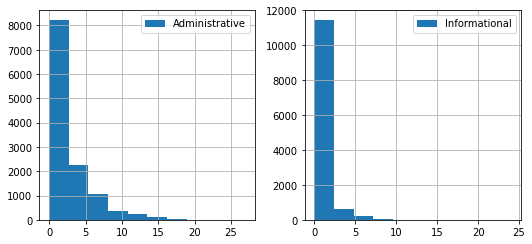

In [139]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)

for i, col in enumerate(['Administrative','Informational']):
    df[col].hist(ax=axes[i],legend=True)

plt.show()

In [140]:
df[['Administrative','Informational']].mean()

Administrative    2.315166
Informational     0.503569
dtype: float64

Users mostly visted very low number of Administrative and Informational pages. See the mean of each features above.

Now we will look at the feature, ProductRelated.

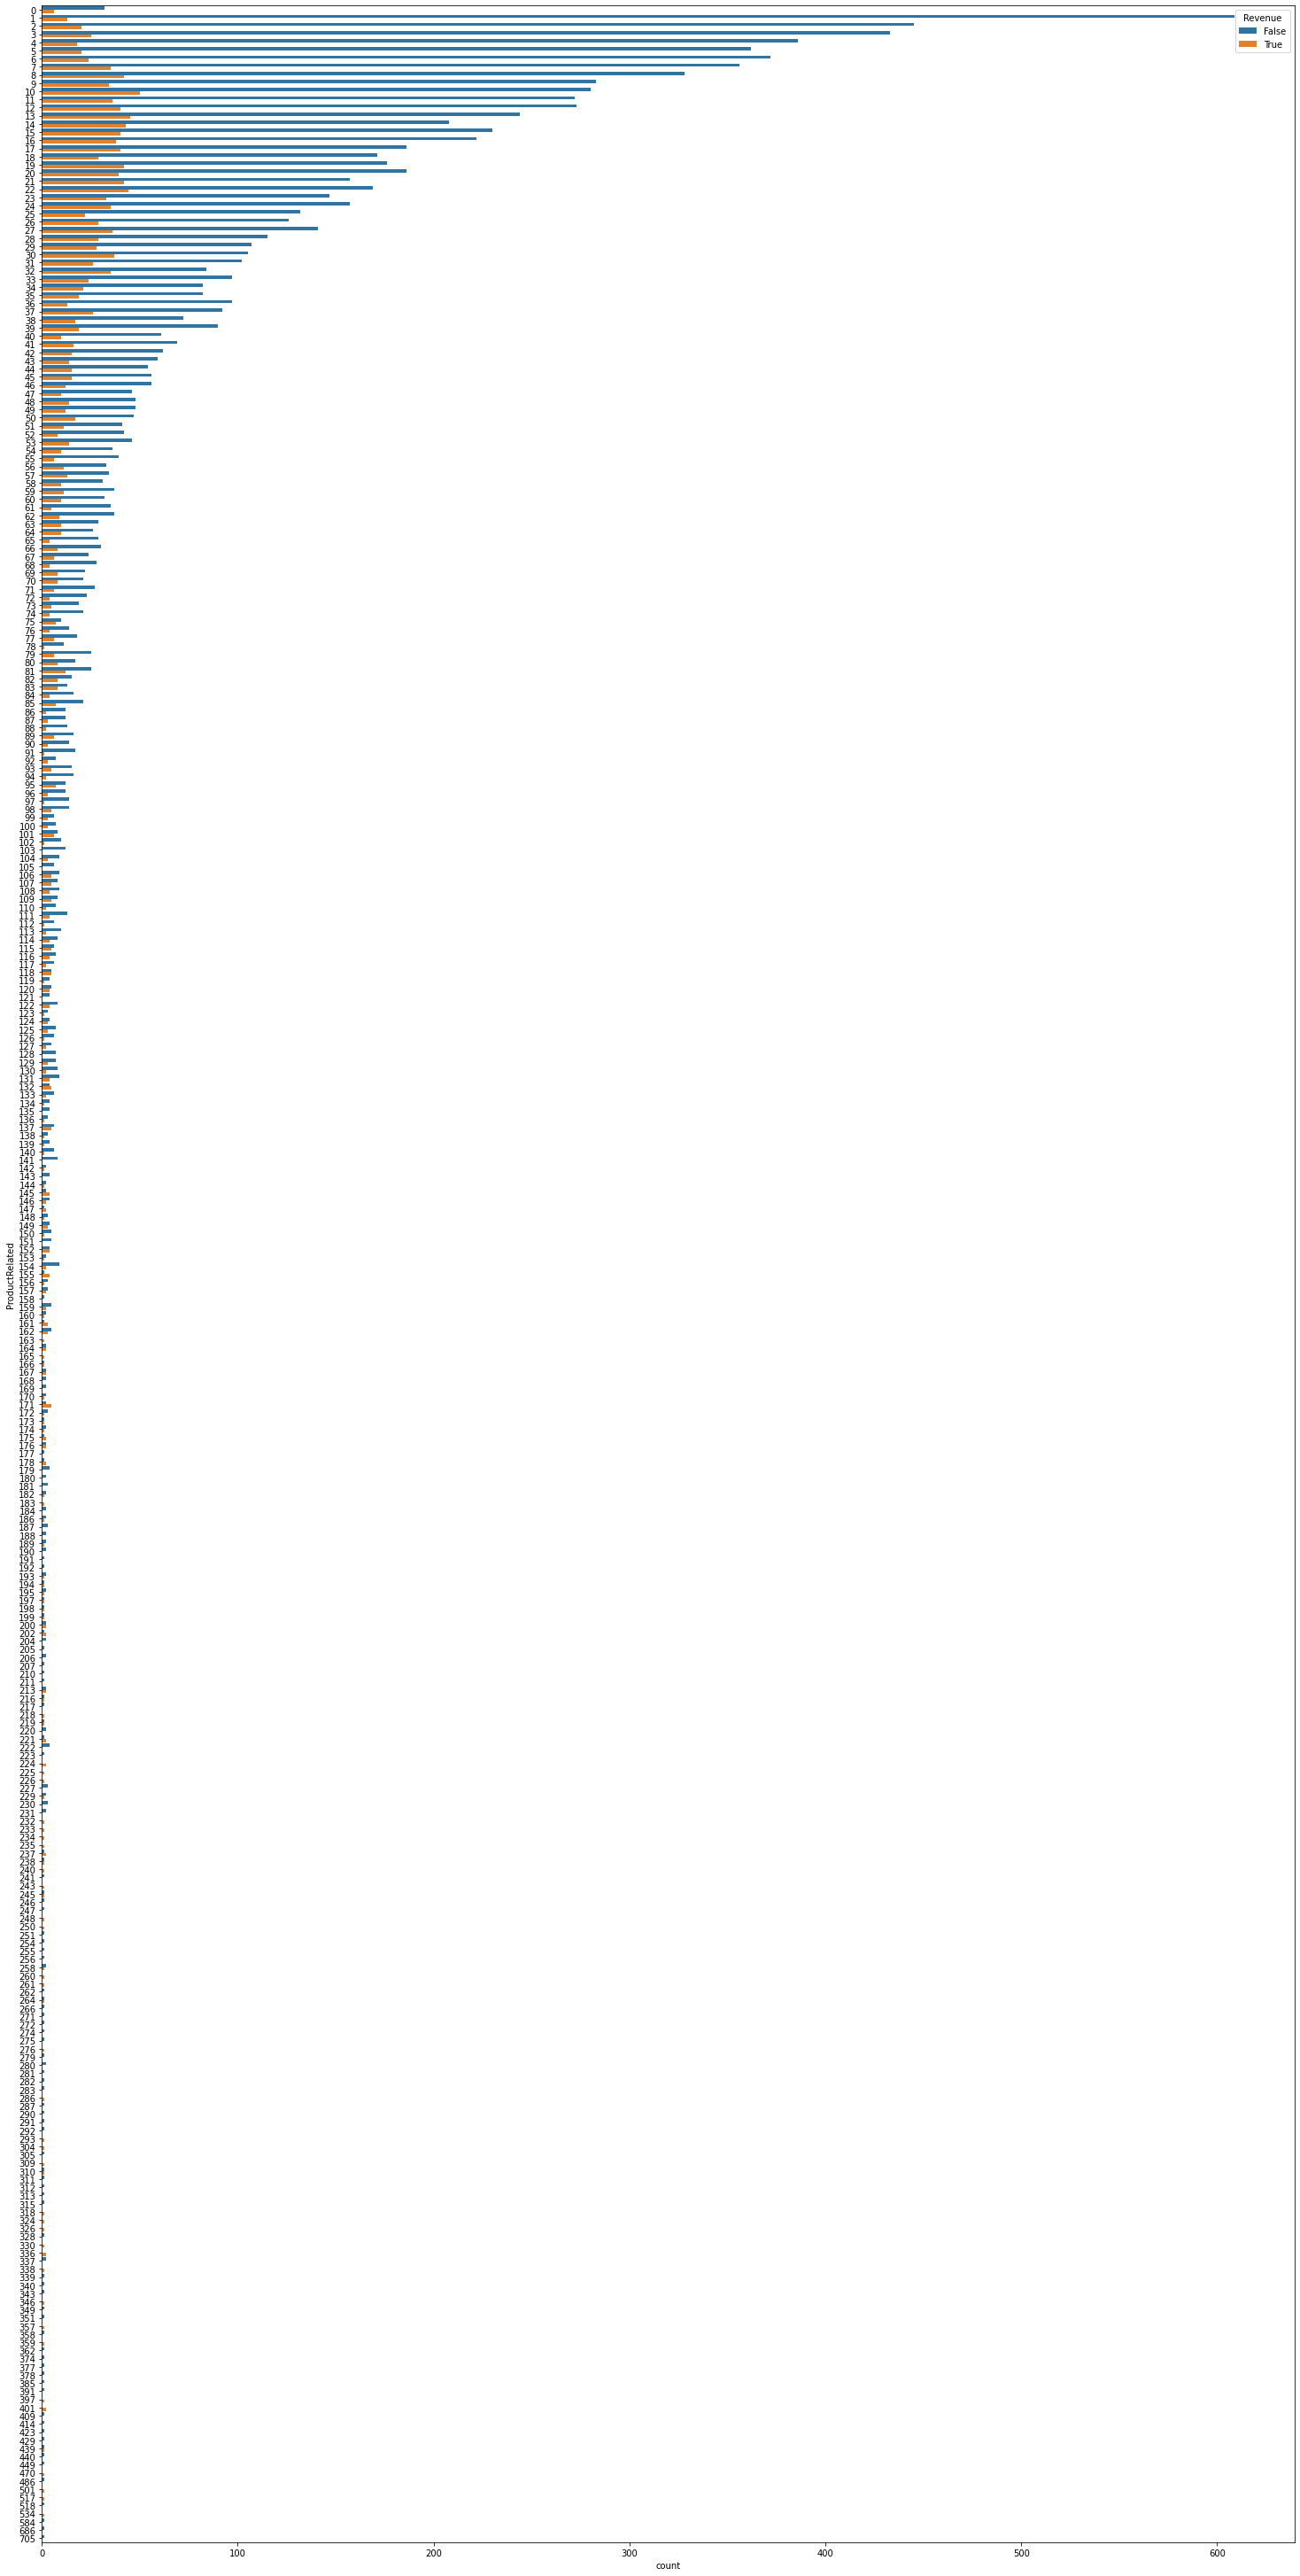

In [141]:
plt.rcParams["figure.figsize"] = [20.50, 40.50]
sns.countplot(data=df, y="ProductRelated", hue="Revenue")

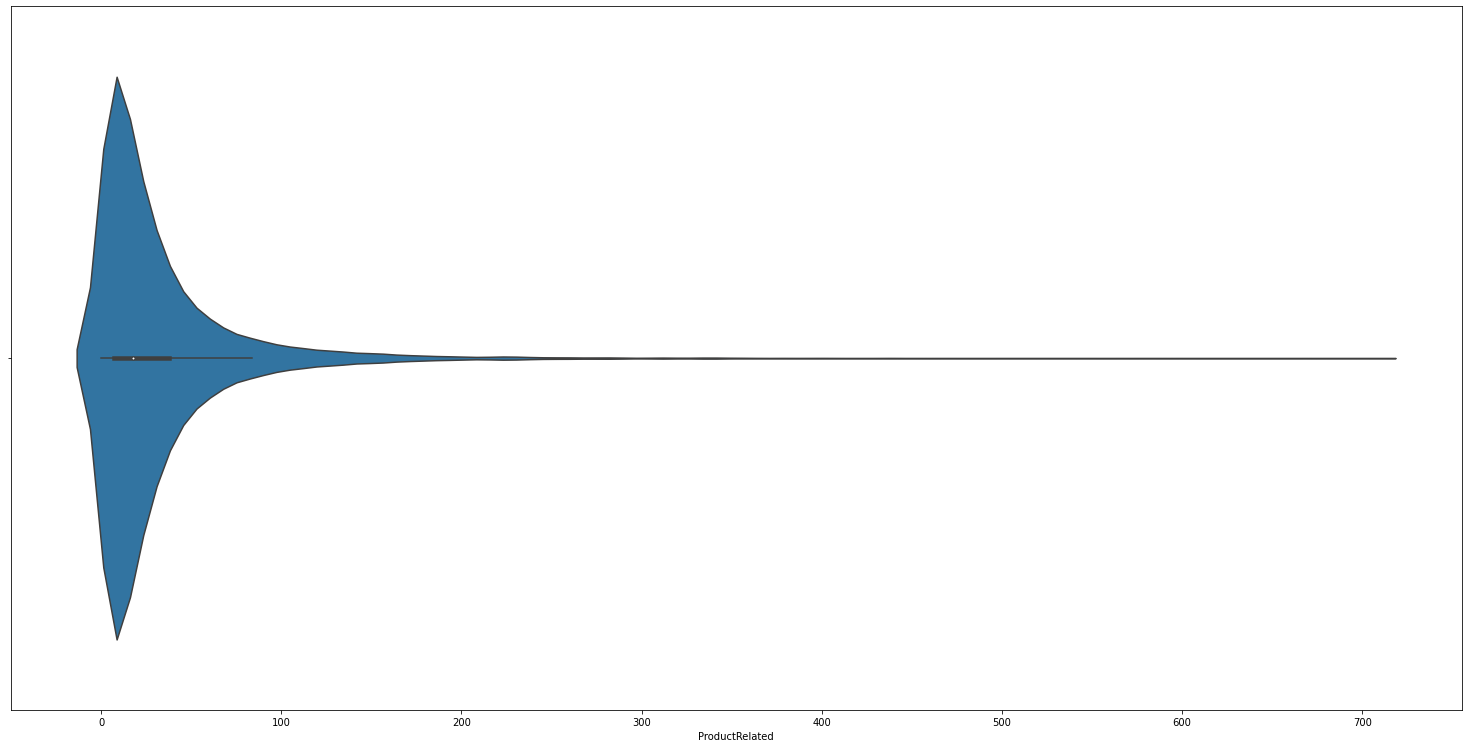

In [142]:
plt.rcParams["figure.figsize"] = [20.50, 10.50]
sns.violinplot(x=df['ProductRelated'])

We can approximately find out that users mostly visited product related page less than 50 times. Hard to get insights from the upper plot. Lets dig deeper. Maybe finding out the relationship with 'Revenue' might help.

In [143]:
pdf = pd.pivot_table(df, 
                  index= 'ProductRelated' ,
                  columns= 'Revenue'  ,
                  values=  'Region'    ,
                  aggfunc= 'count' ).sort_values(by=False, ascending=False)

#revenue proportion
pdf['proportion_True']  = pdf[True]/(pdf[False]+pdf[True])
pdf

Revenue,False,True,proportion_True
ProductRelated,,,
1,609.0,13.0,0.020900
2,445.0,20.0,0.043011
3,433.0,25.0,0.054585
4,386.0,18.0,0.044554
6,372.0,24.0,0.060606
...,...,...,...
401,NaN,2.0,NaN
470,NaN,1.0,NaN
501,NaN,1.0,NaN


There are products, pages of which were visted many times by users. However, this does not mean they are making a good sale. The conversion rates are quite low.  

Lets sort the rows by the new column

In [144]:
pdf.sort_values(by='proportion_True', ascending=False)[:30]

Revenue,False,True,proportion_True
ProductRelated,,,
155,1.0,4.0,0.800000
161,1.0,3.0,0.750000
171,2.0,5.0,0.714286
147,1.0,2.0,0.666667
237,1.0,2.0,0.666667
202,1.0,2.0,0.666667
178,1.0,2.0,0.666667
221,1.0,2.0,0.666667
175,1.0,2.0,0.666667


In [145]:
df['ProductRelated'].mean()

31.731467964314678

> Average number of visiting product related pages is 32. 


### Nominal Features
Lets just change numerical features below to categorical features because they are meant to be categorical.

In [146]:
nominal_f = ['OperatingSystems','Browser','Region','TrafficType']

for col in nominal_f:
  df[col] = df[col].astype(str)

## 2.1.2 Object features

In [147]:
for col in df.select_dtypes('object').columns:
  print(col,' : ' ,df[col].unique(),'\n')

Month  :  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 

OperatingSystems  :  ['1' '2' '4' '3' '7' '6' '8' '5'] 

Browser  :  ['1' '2' '3' '4' '5' '6' '7' '10' '8' '9' '12' '13' '11'] 

Region  :  ['1' '9' '2' '3' '4' '5' '6' '7' '8'] 

TrafficType  :  ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '18'
 '19' '16' '17' '20'] 

VisitorType  :  ['Returning_Visitor' 'New_Visitor' 'Other'] 



So now we have 6 categorical features, not including boolean features. 

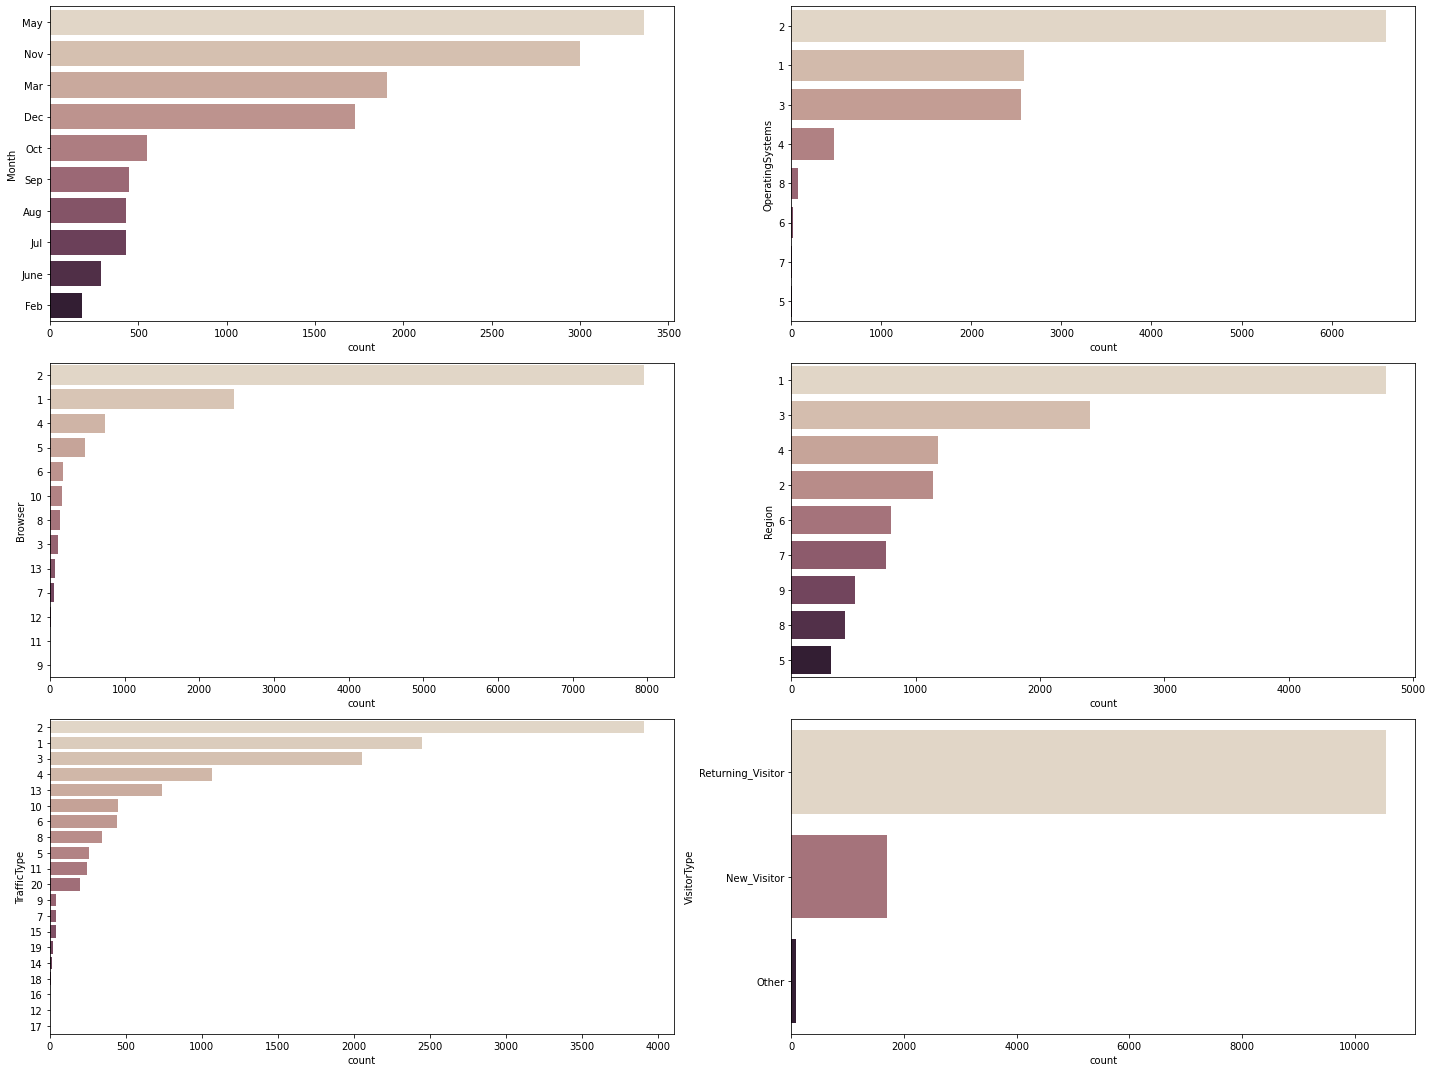

In [148]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize=(20,15))
axes = axes.flatten()

for ax, col in zip(axes,df.select_dtypes('object')):
  sns.countplot(y=col,data=df, ax=ax, palette='ch:.25', order= df[col].value_counts().index);

plt.tight_layout()
plt.show()

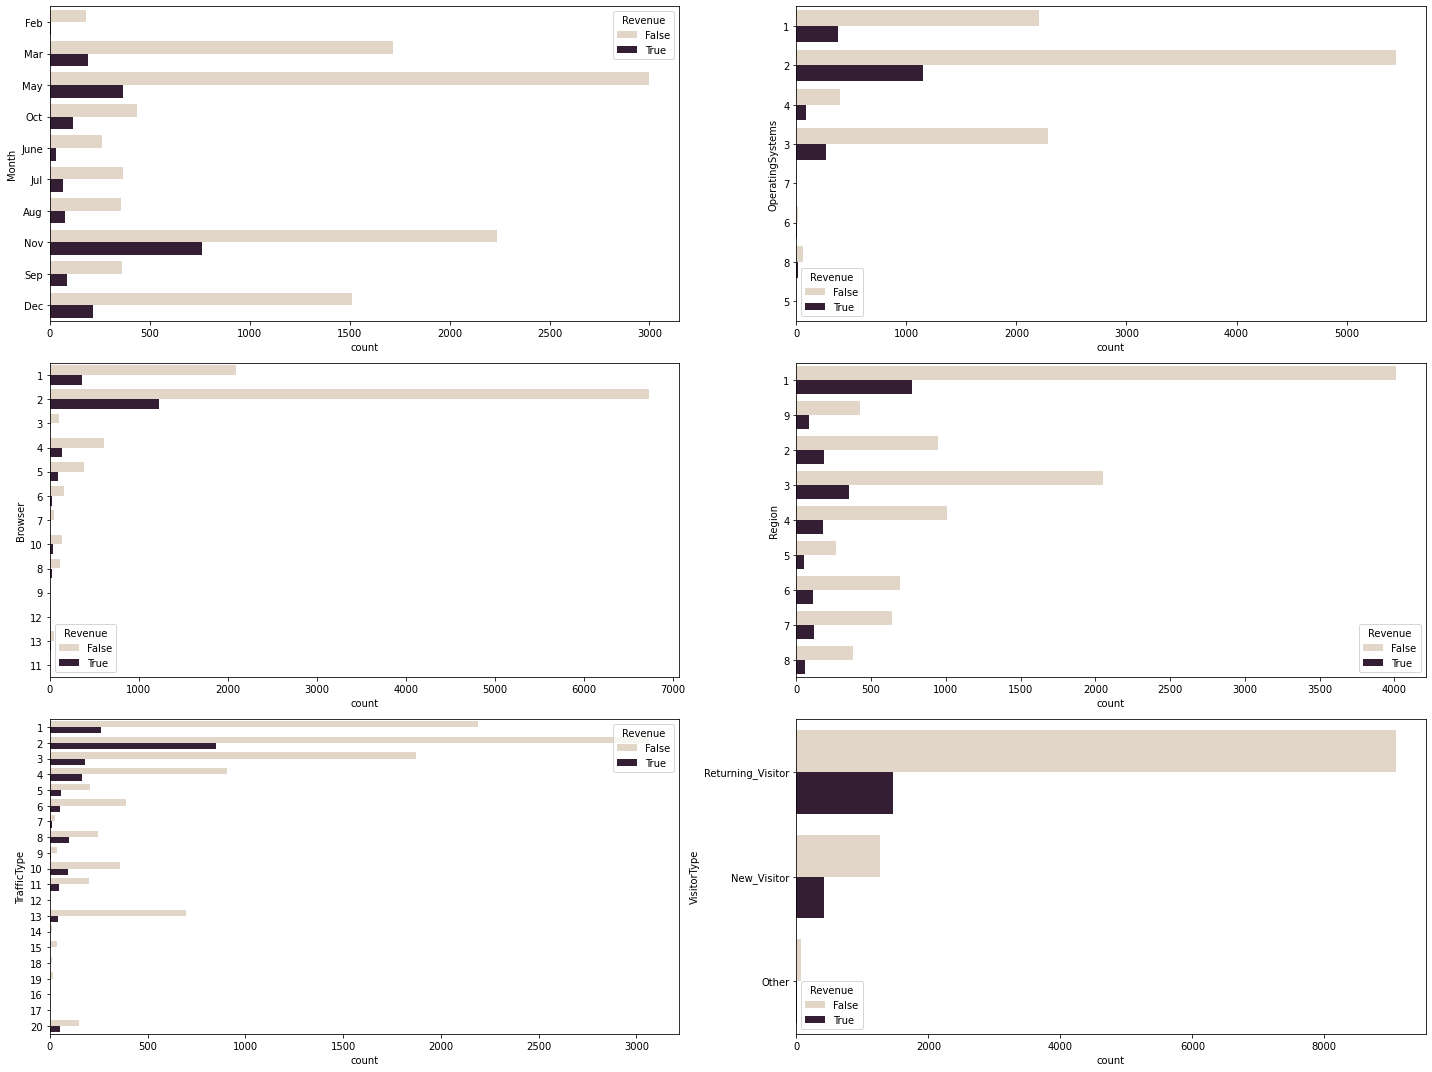

In [149]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('object')):
    sns.countplot(y=col, hue='Revenue', data=df, ax=ax, palette='ch:.25')
plt.tight_layout()
plt.show()

- Month: The number of sessions is highest in May but more sessions were able to led to purchase in November.

- Operating System: Users used '2' the most.

- Browser: Users used '2' the most.

- Region: Region 1 must be very much populated!

- Traffic Type 2 followed by 1 should be our main marketing pipelines. 

- Many visitors return to the shop for new purchases. But it seems that many of them were not able to find what they want in the shop. 

## 2.1.3 Float64 Features

In [150]:
df.select_dtypes('float64').columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay'],
      dtype='object')

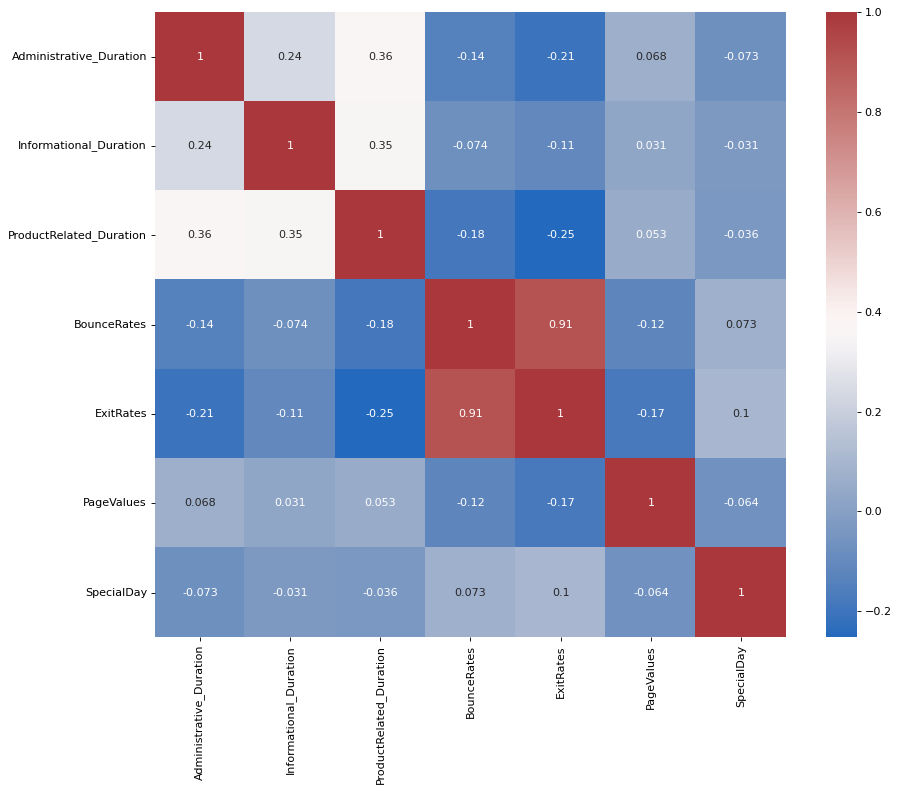

In [151]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)

cmap = sns.color_palette('vlag', as_cmap=True)

sns.heatmap(df.select_dtypes(['float64']).corr(), cmap=cmap,  annot=True)
plt.show()

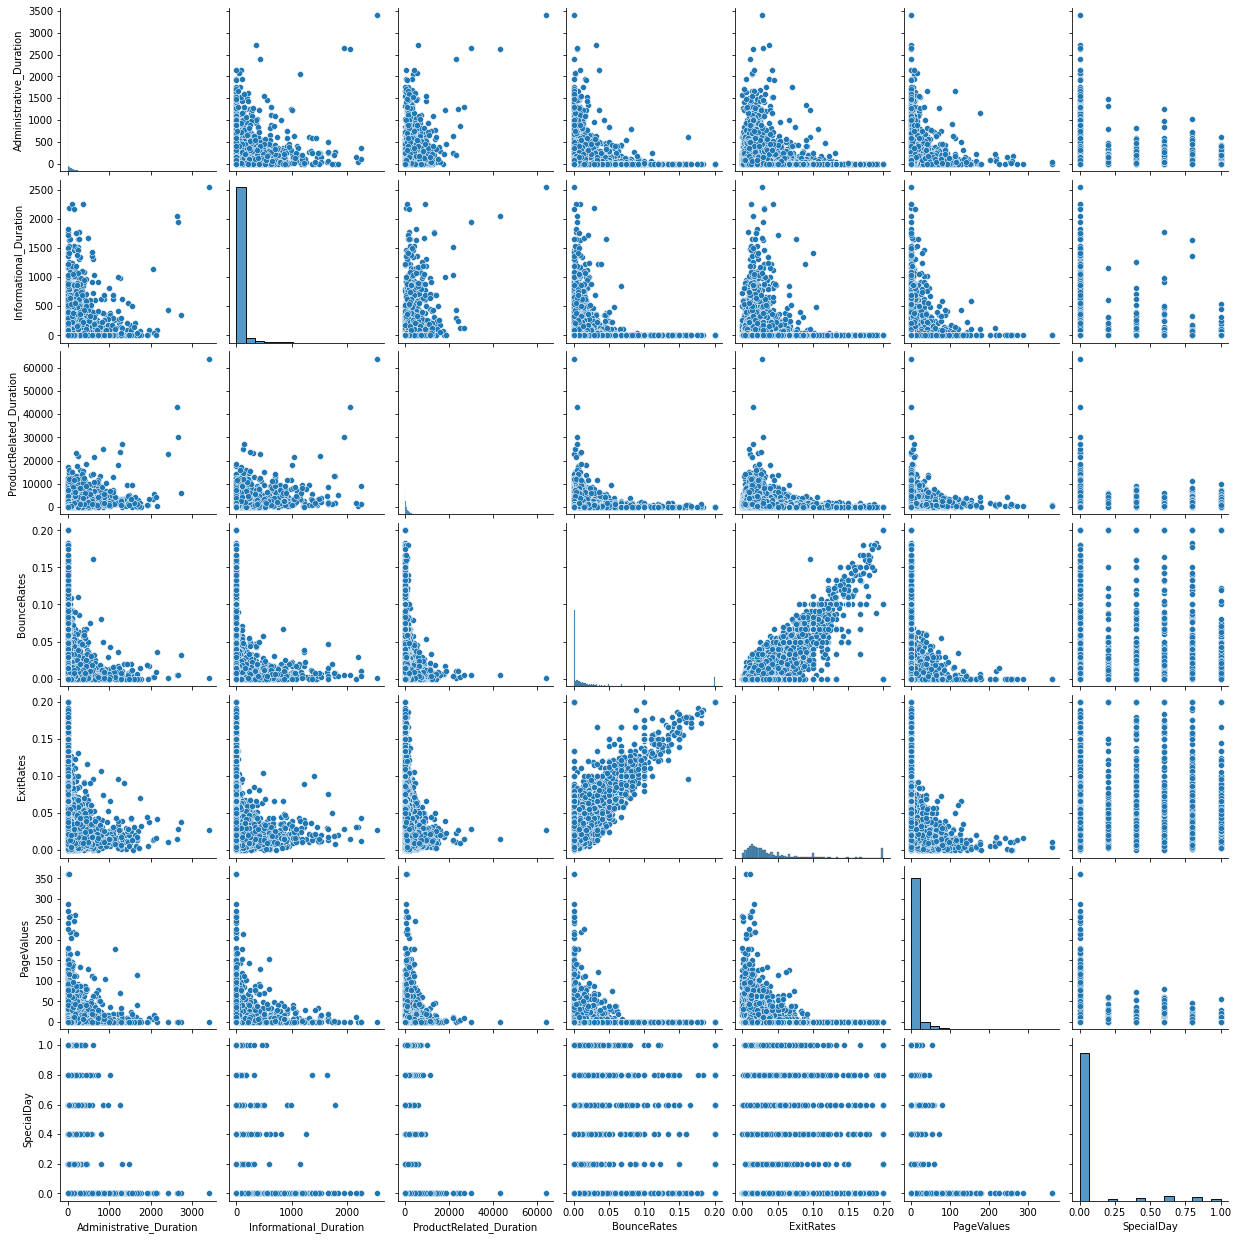

In [152]:
sns.pairplot(df.select_dtypes(['float64']))

Looking at the pairplot, we can see that there is one feature that looks more like a ordinal feature: SpeicalDay.

In [153]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

# 3. Data Preprocessing

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [155]:
dff = df.copy()

## Data Splitting

In [156]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Revenue'])
y = df.Revenue
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state= 0, test_size=0.2)

In [157]:
X_train_a = X_train.copy()
X_test_a = X_test.copy()

In [158]:
X_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 2509 to 2732
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   object 
 12  Browser                  9864 non-null   object 
 13  Region                   9864 non-null   object 
 14  TrafficType          

### Data Transformation
We will use sklearn's Pipeline and column transformation to apply scaler to numerical features and onehotencoding to categorical features.

In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features_a = X_train_a.select_dtypes(include=['int64','float64']).columns
cat_features_a = X_train_a.select_dtypes(include=['object','bool']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder()
preprocessor_a = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_a),
    ('cat', cat_transformer, cat_features_a)
])

preprocessor_a = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_a),
    ('cat', cat_transformer, cat_features_a)
])
X_train_a = preprocessor_a.fit_transform(X_train_a)
X_test_a = preprocessor_a.transform(X_test_a)

In [160]:
X_train_a.shape, X_test_a.shape

((9864, 75), (2466, 75))

After the data transformation we have now 75 columns. For training model we have 9864 datasets and for testing model 2466.

# Model Training

In [161]:
from sklearn import base
from collections import defaultdict
from matplotlib.ticker import FixedLocator, FixedFormatter
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

We will test various classifiers with parameters to find out which classifier best works for our dataset.

> I refered the code from https://www.notion.so/KOR-Chung-A-s-Portfolio-6fbab0fb47c64aebb473fb8ae6cbe84c#3221b291d18e4641b498fade5610151f

In [162]:
RANDOM_SEED = 121

#Classifiers
logreg_clf = LogisticRegression(solver='saga', max_iter=500,
                               random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
bnb_clf = BernoulliNB()
knn_clf = KNeighborsClassifier()
lsvm_clf = LinearSVC(max_iter=5000, dual=False)

In [163]:
#Parameters
logreg_params = dict(C=loguniform(1e-1, 1e2),
                     penalty=['l1', 'l2'])
dt_params = dict(criterion=['gini', 'entropy'],
                 min_samples_split=[2, 4, 6, 8, 10],
                 max_depth=[2, 4, 6, 8, 10])
bnb_params = dict(alpha=loguniform(1e-1, 1e0))
knn_params = dict(n_neighbors=[2, 4, 6, 8, 10, 12, 14, 20],
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan'])
lsvm_params = dict(C=loguniform(1e-1, 1e2))

In [164]:
clf_list = [logreg_clf, dt_clf, bnb_clf, knn_clf, lsvm_clf]
params_list = [logreg_params, dt_params, bnb_params, knn_params, lsvm_params]
model_names = ['Logistic Regression', 'Decison Tree', 'Bernoulli Naive Bayes',
               'KNN Classifier', 'Linear SVM']

In [165]:
def train_model(X, y, model_suffix, clf_list=clf_list, params_list=params_list):
    for i in range(len(clf_list)):
        # model training with RandomizedSearchCV
        rscv = RandomizedSearchCV(estimator=clf_list[i],
                                  param_distributions=params_list[i],
                                  n_jobs=-1, random_state=RANDOM_SEED).fit(X, y)
        # store cv results
        globals()['rscv%s' % model_suffix[i]] = pd.DataFrame(rscv.cv_results_)
        # store the best model
        globals()['best%s' % model_suffix[i]] = rscv

In [166]:
def record_best_result(model_list, model_suffix):
    # store the best results into a dataframe
    for i in range(len(model_list)):
        globals()['df%s' % model_suffix[i]] = model_list[i].query('rank_test_score == 1')\
        [['params', 'mean_test_score', 'std_test_score']]

In [167]:
def model_eval(clf_list, model_names, X_test, y_test):
    test_acc = []
    f1_score = []
    for clf in clf_list:
        test_acc.append(clf.score(X_test, y_test))
        f1_score.append(metrics.f1_score(y_test, clf.predict(X_test)))
    return pd.DataFrame(data={'model': model_names, 'test_acc': test_acc, 'f1_score': f1_score})

In [168]:
# train models
model_suffix_a = ['_logreg_a', '_dt_a', '_bnb_a', '_knn_a', '_lsvm_a']
train_model(X_train_a, y_train, model_suffix_a)

# record best results in cross validation
rscv_list_a = [rscv_logreg_a, rscv_dt_a, rscv_bnb_a, rscv_knn_a, rscv_lsvm_a]
record_best_result(rscv_list_a, model_suffix_a)

# output the best results as a dataframe
df_list_a = [df_logreg_a, df_dt_a, df_bnb_a, df_knn_a, df_lsvm_a]
for df, model in zip(df_list_a, model_names):
    df['model'] = model
result_df_a = pd.concat(df_list_a)

# check test scores
best_clfs_a = [best_logreg_a, best_dt_a, best_bnb_a, best_knn_a, best_lsvm_a]
test_result_a = model_eval(best_clfs_a, model_names, X_test_a, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [169]:
result_df_a

,params,mean_test_score,std_test_score,model
9,"{'C': 2.814953286122724, 'penalty': 'l2'}",0.887976,0.003002,Logistic Regression
2,"{'min_samples_split': 10, 'max_depth': 6, 'cri...",0.904096,0.006181,Decison Tree
3,"{'min_samples_split': 6, 'max_depth': 6, 'crit...",0.904096,0.006181,Decison Tree
8,"{'min_samples_split': 2, 'max_depth': 6, 'crit...",0.904096,0.006181,Decison Tree
9,{'alpha': 0.9303779290908711},0.844689,0.009665,Bernoulli Naive Bayes
7,"{'weights': 'uniform', 'n_neighbors': 12, 'met...",0.883414,0.004936,KNN Classifier
5,{'C': 1.6740107582372934},0.884428,0.004474,Linear SVM


In [170]:
test_result_a

,model,test_acc,f1_score
0,Logistic Regression,0.871046,0.495238
1,Decison Tree,0.886861,0.637191
2,Bernoulli Naive Bayes,0.831306,0.553648
3,KNN Classifier,0.863747,0.424658
4,Linear SVM,0.864558,0.437710


> Our accuracy scores dont look so bad but the f1-scores are quite low. This is probably because ourdataset is imbalanced. Lets check this once again. 

# Fine-tuning

## Stratify Dataset

In [171]:
dff.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Our dataset is very much imbalanced as the number of True values is only around 10% of the False values.

Here, we will try to 'stratify' our dataset.

In [172]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

> 'stratify = y' means the training and test dataset will have same y class proportion as the whole dataset. 

In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features_b = X_train_b.select_dtypes(include=['int64','float64']).columns
cat_features_b = X_train_b.select_dtypes(include=['object','bool']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder()
preprocessor_b = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_b),
    ('cat', cat_transformer, cat_features_b)
])

preprocessor_b = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_b),
    ('cat', cat_transformer, cat_features_b)
])
X_train_b = preprocessor_b.fit_transform(X_train_b)
X_test_b = preprocessor_b.transform(X_test_b)

In [174]:
# train models
model_suffix_b = ['_logreg_b', '_dt_b', '_bnb_b', '_knn_b', '_lsvm_b']
train_model(X_train_b, y_train_b, model_suffix_b)

# record best results in cross validation
rscv_list_b = [rscv_logreg_b, rscv_dt_b, rscv_bnb_b, rscv_knn_b, rscv_lsvm_b]
record_best_result(rscv_list_b, model_suffix_b)

# output the best results as a dataframe
df_list_b = [df_logreg_b, df_dt_b, df_bnb_b, df_knn_b, df_lsvm_b]
for df, model in zip(df_list_b, model_names):
    df['model'] = model
result_df_b = pd.concat(df_list_b)

# check test scores
best_clfs_b = [best_logreg_b, best_dt_b, best_bnb_b, best_knn_b, best_lsvm_b]
test_result_b = model_eval(best_clfs_b, model_names, X_test_b, y_test_b)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [175]:
test_result_b

,model,test_acc,f1_score
0,Logistic Regression,0.880373,0.483363
1,Decison Tree,0.894566,0.626437
2,Bernoulli Naive Bayes,0.834955,0.534857
3,KNN Classifier,0.866180,0.386617
4,Linear SVM,0.872263,0.402277


Stratified dataset seems to have no difference from the not-stratified dataset. 

## Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

### Undersampling (Default)
Default RandomUndersampler will minimize the number of the majority class to have the same number as the minority class. This will make our dataset balanced but much smaller. We can still try the default version to check first, whether undersampling works and  change the ratio of classes later if needed.

In [176]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [177]:
y_res.value_counts()

False    1908
True     1908
Name: Revenue, dtype: int64

In [178]:
X_train_c, X_test_c, y_train_c, y_test_c = \
train_test_split(X_res, y_res, random_state= 0, test_size=0.2)

In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features_c = X_train_c.select_dtypes(include=['int64','float64']).columns
cat_features_c = X_train_c.select_dtypes(include=['object','bool']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder()
preprocessor_c = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_c),
    ('cat', cat_transformer, cat_features_c)
])

preprocessor_c = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_c),
    ('cat', cat_transformer, cat_features_c)
])
X_train_c = preprocessor_c.fit_transform(X_train_c)
X_test_c = preprocessor_c.transform(X_test_c)

In [180]:
# train models
model_suffix_c = ['_logreg_c', '_dt_c', '_bnb_c', '_knn_c', '_lsvm_c']
train_model(X_train_c, y_train_c, model_suffix_c)

# record best results in cross validation
rscv_list_c = [rscv_logreg_c, rscv_dt_c, rscv_bnb_c, rscv_knn_c, rscv_lsvm_c]
record_best_result(rscv_list_c, model_suffix_c)

# output the best results as a dataframe
df_list_c = [df_logreg_c, df_dt_c, df_bnb_c, df_knn_c, df_lsvm_c]
for df, model in zip(df_list_c, model_names):
    df['model'] = model
result_df_c = pd.concat(df_list_c)

# check test scores
best_clfs_c = [best_logreg_c, best_dt_c, best_bnb_c, best_knn_c, best_lsvm_c]
test_result_c = model_eval(best_clfs_c, model_names, X_test_c, y_test_c)

In [181]:
test_result_c

,model,test_acc,f1_score
0,Logistic Regression,0.820681,0.811034
1,Decison Tree,0.845550,0.846354
2,Bernoulli Naive Bayes,0.751309,0.764851
3,KNN Classifier,0.755236,0.741355
4,Linear SVM,0.818063,0.807746


> Default Undersampling has reduced the number of dataset which could cause information loss. Nevertheless, it worked very well without reducing the accuracy score and increased f1 score. Changing the ratio of target classes might work much better.

### Undersampling (desired ratio)

In [206]:
rus = RandomUnderSampler(
    sampling_strategy={
        False: int(10422 * 0.5),
        True: 1908
    },
    random_state=42
)
X_res, y_res = rus.fit_resample(X, y)

In [207]:
y_res.value_counts()

False    5211
True     1908
Name: Revenue, dtype: int64

In [208]:
X_train_d, X_test_d, y_train_d, y_test_d = \
train_test_split(X_res, y_res, random_state= 0, test_size=0.2)

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features_d = X_train_d.select_dtypes(include=['int64','float64']).columns
cat_features_d = X_train_d.select_dtypes(include=['object','bool']).columns

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])
cat_transformer = OneHotEncoder(handle_unknown = "ignore")
preprocessor_d = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_d),
    ('cat', cat_transformer, cat_features_d)
])

preprocessor_d = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features_d),
    ('cat', cat_transformer, cat_features_d)
])
X_train_d = preprocessor_d.fit_transform(X_train_d)
X_test_d = preprocessor_d.transform(X_test_d)

In [210]:
# train models
model_suffix_d = ['_logreg_d', '_dt_d', '_bnb_d', '_knn_d', '_lsvm_d']
train_model(X_train_d, y_train_d, model_suffix_d)

# record best results in cross validation
rscv_list_d = [rscv_logreg_d, rscv_dt_d, rscv_bnb_d, rscv_knn_d, rscv_lsvm_d]
record_best_result(rscv_list_d, model_suffix_d)

# output the best results as a dataframe
df_list_d = [df_logreg_d, df_dt_d, df_bnb_d, df_knn_d, df_lsvm_d]
for df, model in zip(df_list_d, model_names):
    df['model'] = model
result_df_c = pd.concat(df_list_d)

# check test scores
best_clfs_d = [best_logreg_d, best_dt_d, best_bnb_d, best_knn_d, best_lsvm_d]
test_result_d = model_eval(best_clfs_d, model_names, X_test_d, y_test_d)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [211]:
test_result_d

,model,test_acc,f1_score
0,Logistic Regression,0.856742,0.682243
1,Decison Tree,0.880618,0.765193
2,Bernoulli Naive Bayes,0.794944,0.661253
3,KNN Classifier,0.808989,0.538983
4,Linear SVM,0.841292,0.630719


> Undersampling with custom ratio of classes gives us better accuracy but lower f1 score compared to the default Undersampling version. 

# Conclusion

The best model can be achieved after doing default undersampling of the dataset. Afterwards, we did scaling for the numerical features and onehotencoding for the categorical features. Decison Tree gave us the best accuracy of 	0.845550 and f1 score	0.846354. 

There are more experiments to be done to improve our model which might give us better results than our DT model. 

One example can be fine-tuning parameters. Another could be trying Upsampling dataset. Here we did solely Undersampling by using RandomUnderSampler library. 